In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

In [3]:
sc.settings.verbosity = 3

In [4]:
import os
os.chdir('/hpcscratch/ieo/DIMA/scmultiome_mpi/')

In [4]:
import warnings
warnings.filterwarnings('ignore')

# import data

In [7]:
adata_path='/hpcnfs/scratch/DIMA/piva/mpi_freiburg/adata/adata_annotation.h5ad'
adata=sc.read_h5ad(adata_path)

In [8]:
adata.obs[['leiden_res12']].to_csv('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/barcodes_clusters.csv')

In [9]:
markers=pd.read_csv('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/markergenes_ordinati.csv')['Unnamed: 0'].tolist()
markers_fb=adata.var[adata.var['symbol'].isin(markers)]['symbol'].reset_index()

In [10]:
len(markers)

52

In [13]:
adataRNA=sc.read_h5ad('/hpcscratch/ieo/DIMA/scmultiome_mpi/mergelink_clustered_5_RNAassay.h5ad')

In [14]:
colori_samples={'Wild-type':"#00BA38" , "ez":"#619CFF", "CBP":"#F8766D"}

colori_germs= {"anterioposterior_ectoderm": '#002554',
                "mesoderm":'#FA4616',
                "dorsal_ectoderm" :'#5E8AB4',
                "ventral_ectoderm": '#B1C9E8',
                "anterior_endoderm":'#6CC24A',
                "posterior_endoderm": '#007041',
                "yolk" : '#EFDF00',
                "undifferentiated_cells" : '#68478D',
                "pluripotent_progenitors" :'#686E9F',
                "neuroectoderm":"#05C3DE"}

In [15]:
adata.var['FB_id']=adata.var.index
adata.var.set_index('symbol',inplace=True)

In [21]:
adata.obs['annotation_leiden12'].unique()

order_germ=[ 'mesoderm','anterioposterior_ectoderm', 'dorsal_ectoderm','neuroectoderm', 'ventral_ectoderm',  'anterior_endoderm', 'posterior_endoderm','yolk',
 'undifferentiated_cells',  'pluripotent_progenitors']
order_germ_wt=[ 'mesoderm','anterioposterior_ectoderm', 'dorsal_ectoderm','neuroectoderm', 'ventral_ectoderm',  'anterior_endoderm', 'posterior_endoderm','yolk', 'undifferentiated_cells']

In [8]:
germlayer_markergenes=pd.read_csv('germlayer_markergenes.csv').drop(['Unnamed: 0','index'],axis=1)
markers=germlayer_markergenes.groupby('germlayer')['gene'].apply(list).to_dict()

In [9]:
markers

{'Anterioposterior ectoderm': ['hb',
  'ken',
  'Blimp-1',
  'Abd-B',
  'rau',
  'aos',
  'salm'],
 'Anterior endoderm markers': ['Lim1', 'slp1', 'jigr1', 'cnc', 'croc', 'hbn'],
 'Dorsal ectoderm markers': ['Doc3',
  'ush',
  'Doc1',
  'egr',
  'Ance',
  'Doc2',
  'peb'],
 'Mesoderm markers': ['sna',
  'GEFmeso',
  'zfh1',
  'wgn',
  'NetA',
  'stumps',
  'Mes2',
  'ltl',
  'twi'],
 'Neuroectoderm markers': ['l(1)sc', 'mfas', 'SoxN', 'vnd', 'brk', 'sog'],
 'Posterior endoderm markers': ['byn',
  'Ptx1',
  'CG2930',
  'bbg',
  'disco',
  'rib',
  'fkh',
  'tll'],
 'Ventral Ectoderm Markers': ['fra', 'numb', 'lov', 'geko', 'bun', 'Ptr'],
 'Yolk cells': ['beat-IIIc', 'sisA', 'Corp']}

In [10]:
sc.set_figure_params()

In [11]:
import matplotlib
cmap_greyred = matplotlib.colors.LinearSegmentedColormap.from_list("", list(sns.color_palette('Greys',7))[0:4]+['#d62728'])# list(sns.color_palette('Reds',5))[-2:] )   # ['#d62728']) # ["#EAEAEA","#EAEAEA",'#d62728']) # 'red'
#cmap_greyred=shiftedColorMap(cmap_greyred, start=0, midpoint=0.7, stop=1.0, name='greyre')

In [12]:
divnorm=colors.TwoSlopeNorm(vmin=0, vcenter=0.7, vmax=1)

In [25]:
germlayer_markergenes=pd.read_csv('//hpcscratch/ieo/DIMA/scmultiome_mpi/germlayer_markergenes.csv', index_col=[3]).drop(['Unnamed: 0','index'],axis=1).to_dict()
#germlayer_markergenes['germlayer']

In [13]:
list(markers.values())
all_markes=[item for sublist in list(markers.values()) for item in sublist]

## adataRNA

In [27]:
conv_symbol2fb=adata.var['FB_id'].to_dict()
conv_fb2symbol = {v: k for k, v in conv_symbol2fb.items()}

In [28]:
sc.pp.normalize_total(adataRNA, target_sum=1e6) #CPM
sc.pp.log1p(adataRNA)

normalizing counts per cell
    finished (0:00:00)


In [29]:
adataRNA.var['symbol']=adataRNA.var.index.map(conv_fb2symbol)

In [30]:
adataRNA.var.loc[adataRNA.var[adataRNA.var['symbol'].isna()].index,'symbol']=adataRNA.var.loc[adataRNA.var[adataRNA.var['symbol'].isna()].index].index

In [31]:
adataRNA.var['FLYBASE']=adataRNA.var.index
adataRNA.var.set_index('symbol',inplace=True)

In [32]:
adataRNA.obs['annotation_leiden12']=adata.obs['annotation_leiden12']
adataRNA.obs['group']=adata.obs['group']

## Differential expression - Ez vs wt

In [33]:
adataezwt=adataRNA[adataRNA.obs['sample']!='nej'].copy()

In [34]:
all_markers=[item for sublist in list(markers2.values()) for item in sublist]

In [35]:
pairs_dict={
     'mesoderm': ['ez-mesoderm',  'wt-mesoderm'], 
        'anterioposterior_ectoderm':['ez-anterioposterior_ectoderm', 'wt-anterioposterior_ectoderm'],
    'dorsal_ectoderm':['ez-dorsal_ectoderm','wt-dorsal_ectoderm'],
    'neuroectoderm':['ez-neuroectoderm', 'wt-neuroectoderm'],
     'ventral_ectoderm': ['ez-ventral_ectoderm','wt-ventral_ectoderm'],
        'anterior_endoderm':['ez-anterior_endoderm','wt-anterior_endoderm'],
        'posterior_endoderm':['ez-posterior_endoderm','wt-posterior_endoderm'], 
        'yolk':  ['ez-yolk','wt-yolk'],
    'undifferentiated_cells':['ez-undifferentiated_cells','wt-undifferentiated_cells']
}

In [36]:

## Markers


resfc={}
resppv={}
respct=[]
for k,v in pairs_dict.items():
    sc.tl.rank_genes_groups(adataezwt, 'group', groups=[v[0]], reference=v[1],
                            method='wilcoxon', key_added = "%s_wilcoxon"%(k) , pts=True)

    result = adataezwt.uns["%s_wilcoxon"%(k)]
    groups = result['names'].dtype.names
    result = pd.DataFrame(
        {group + '_' + key: result[key][group]
        for group in groups for key in ['names', 'pvals_adj', 'logfoldchanges']})
   # resfc[k]=[result[['ez-%s_names'%(k),'ez-%s_logfoldchanges'%(k)]]  ]  # considering pvalue?
    result.set_index('ez-%s_names'%(k),inplace=True)
    
    # select just markers genes
    result=result.loc[all_markers]
    resfc['ez-%s_logfoldchanges'%(k)]=result['ez-%s_logfoldchanges'%(k)]
    resppv['ez-%s_pvals_adj'%(k)]=result['ez-%s_pvals_adj'%(k)]
    
    respct.append(adataezwt.uns["%s_wilcoxon"%(k)]['pts'])

ranking genes
    finished: added to `.uns['mesoderm_wilcoxon']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:05)
ranking genes
    finished: added to `.uns['anterioposterior_ectoderm_wilcoxon']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)
ranking genes
    finished: added to `.uns['dorsal_ectoderm_wilcoxon']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', so

In [37]:
resfc=pd.DataFrame.from_dict(resfc)
resfc.head()

,ez-mesoderm_logfoldchanges,ez-anterioposterior_ectoderm_logfoldchanges,ez-dorsal_ectoderm_logfoldchanges,ez-neuroectoderm_logfoldchanges,ez-ventral_ectoderm_logfoldchanges,ez-anterior_endoderm_logfoldchanges,ez-posterior_endoderm_logfoldchanges,ez-yolk_logfoldchanges,ez-undifferentiated_cells_logfoldchanges
GEFmeso,-1.302467,-0.055501,-0.147462,-0.005013,1.116028,-0.149601,-0.994340,0.279786,-0.810753
Mes2,0.047175,2.093223,0.516877,1.427172,3.282191,-0.749413,0.179756,0.316869,-0.732568
NetA,0.386926,0.207935,1.056356,0.828035,2.316908,0.071734,0.783197,0.646202,1.107895
ltl,-0.367225,-0.237899,-0.861387,-0.599136,0.446801,-0.531014,0.015779,-0.970267,0.193621
sna,1.566459,0.902125,1.636741,1.147732,1.818719,0.742307,1.952631,2.392506,1.268061


In [38]:
resppv=pd.DataFrame.from_dict(resppv)
resppv.head()

,ez-mesoderm_pvals_adj,ez-anterioposterior_ectoderm_pvals_adj,ez-dorsal_ectoderm_pvals_adj,ez-neuroectoderm_pvals_adj,ez-ventral_ectoderm_pvals_adj,ez-anterior_endoderm_pvals_adj,ez-posterior_endoderm_pvals_adj,ez-yolk_pvals_adj,ez-undifferentiated_cells_pvals_adj
GEFmeso,1.128152e-10,1.0,1.0,1.000000,1.000000,1.0,0.332180,1.0,1.0
Mes2,1.000000e+00,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.0,1.0
NetA,1.000000e+00,1.0,1.0,0.023152,0.000014,1.0,1.000000,1.0,1.0
ltl,1.000000e+00,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.0,1.0
sna,1.375447e-07,1.0,1.0,1.000000,1.000000,1.0,0.436105,1.0,1.0


In [39]:
respct=pd.concat(respct, axis=1)
respct=respct.loc[all_markers]

In [40]:
respct.head()

,ez-mesoderm,wt-mesoderm,ez-anterioposterior_ectoderm,wt-anterioposterior_ectoderm,ez-dorsal_ectoderm,wt-dorsal_ectoderm,ez-neuroectoderm,wt-neuroectoderm,ez-ventral_ectoderm,wt-ventral_ectoderm,ez-anterior_endoderm,wt-anterior_endoderm,ez-posterior_endoderm,wt-posterior_endoderm,ez-yolk,wt-yolk,ez-undifferentiated_cells,wt-undifferentiated_cells
symbol,,,,,,,,,,,,,,,,,,
GEFmeso,0.389474,0.491188,0.102564,0.102564,0.039773,0.041245,0.077112,0.073957,0.039816,0.019303,0.045205,0.048453,0.184669,0.247289,0.041026,0.034483,0.017762,0.029412
Mes2,0.201053,0.189655,0.010989,0.002564,0.005682,0.003618,0.021329,0.007796,0.012251,0.001245,0.021918,0.033275,0.038328,0.032538,0.037607,0.031034,0.007105,0.011029
NetA,0.902105,0.853640,0.153846,0.141026,0.073864,0.040521,0.324856,0.244627,0.163093,0.049813,0.147945,0.135435,0.120209,0.078091,0.105983,0.075862,0.092362,0.051471
ltl,0.216842,0.239847,0.018315,0.020513,0.005682,0.009407,0.028712,0.040455,0.014548,0.010585,0.083562,0.106246,0.057491,0.056399,0.015385,0.027586,0.015986,0.014706
sna,0.436842,0.291188,0.029304,0.015385,0.028409,0.009407,0.036095,0.016646,0.042879,0.013076,0.060274,0.039113,0.120209,0.041215,0.059829,0.013793,0.031972,0.014706


In [43]:

# minimum pct of cells expressing the gene at least in one group
threshold=0.01


keep_pct=pd.DataFrame(index=respct.index)
for k,v in pairs_dict.items():
    pct_tmp=respct[v]
    keep_pct[k]=np.sum(pct_tmp>threshold, axis=1)>0

    test[t]=keep_pct.sum().values

In [45]:
keep_pct.head()

,mesoderm,anterioposterior_ectoderm,dorsal_ectoderm,neuroectoderm,ventral_ectoderm,anterior_endoderm,posterior_endoderm,yolk,undifferentiated_cells
symbol,,,,,,,,,
GEFmeso,True,True,True,True,True,True,True,True,True
Mes2,True,True,False,True,True,True,True,True,True
NetA,True,True,True,True,True,True,True,True,True
ltl,True,True,False,True,True,True,True,True,True
sna,True,True,True,True,True,True,True,True,True


In [63]:
keep_pct.columns=resfc.columns
resfc_df=resfc.where(keep_pct)

In [64]:
keep_pct.columns=resppv.columns
resppv_df=resppv.where(keep_pct)

In [49]:
from matplotlib import colors
divnorm=colors.TwoSlopeNorm(vmin=-4, vcenter=0., vmax=4)
#pcolormesh(resfc.loc[all_markes], cmap="coolwarm", norm=divnorm)

In [50]:
col=resfc.columns
col=[e.replace('ez-','ez_vs_wt_-_').replace('_logfoldchanges','').replace('_',' ') for e in col]

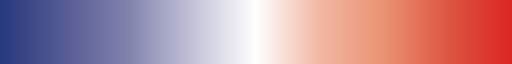

In [51]:
cmap_blured = matplotlib.colors.LinearSegmentedColormap.from_list("", 
                                                                  list(['#273a7e', '#575c95','#8183ae', '#c4c2d8', 
                                                                       'white', 
                                                                       '#f3b7a3', '#eb9374', '#de5742', '#dc2624'
                                                                 ] ))
cmap_blured

In [52]:
cmap_blured.set_bad('lightgrey')

In [53]:

#resppv=resppv.T
resppvsign=resppv<0.05
# resppvsign.replace(False, '',inplace=True)
# resppvsign.replace(True, '*',inplace=True)

In [54]:
all(resppvsign.index==resfc.index), all(resppvsign.columns==resfc.columns)

(True, False)

In [55]:
resppvsign.columns=resfc.columns

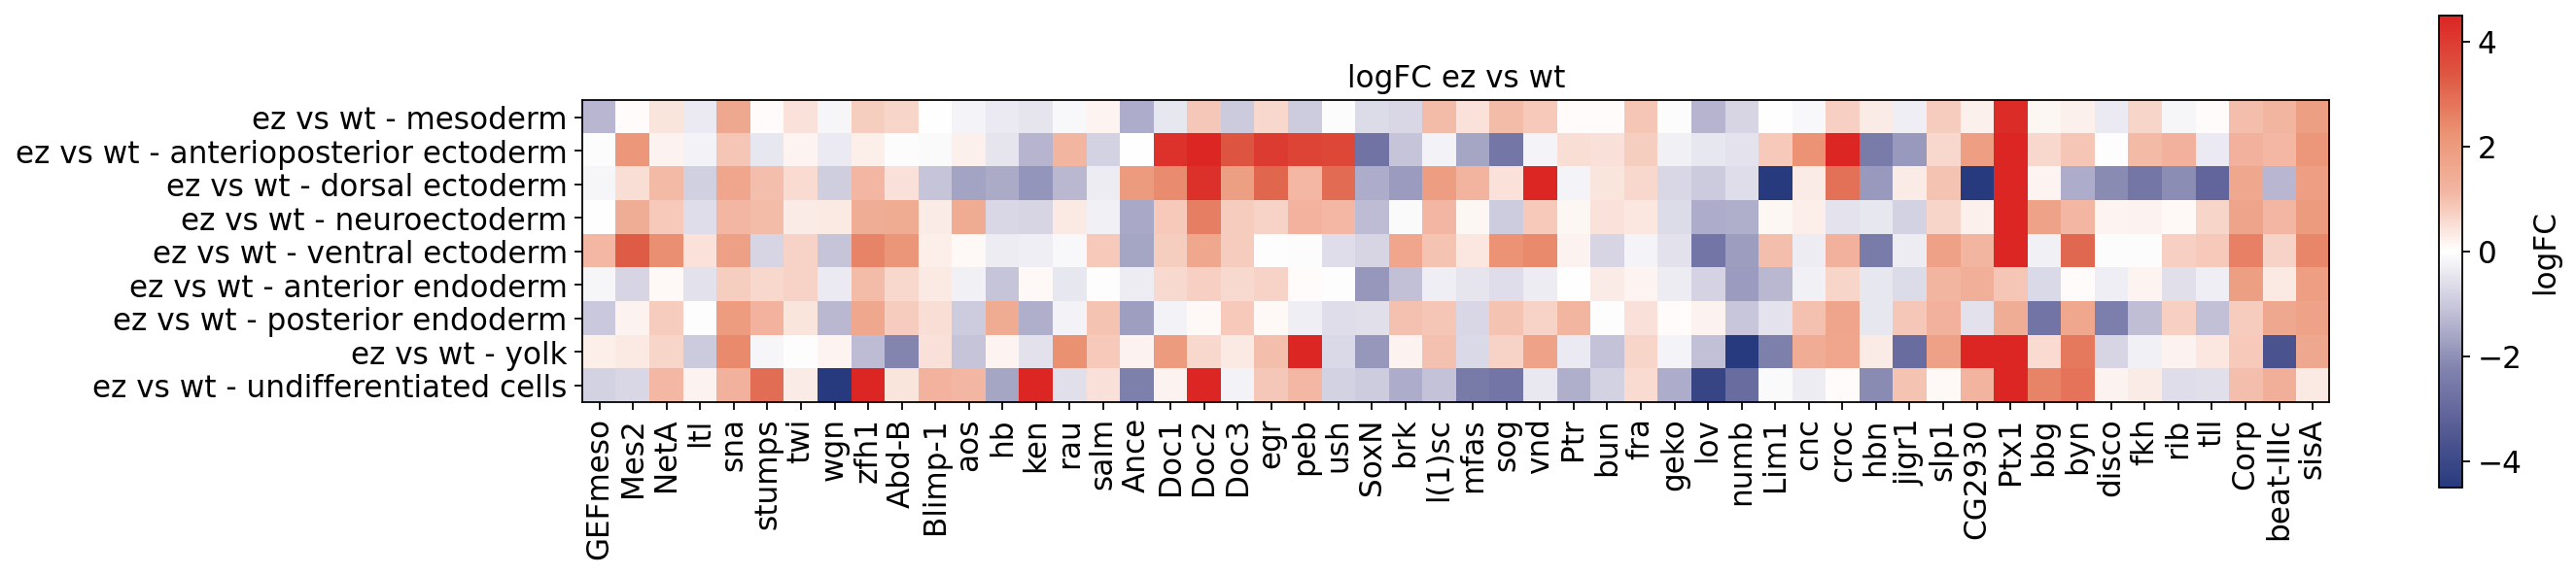

In [73]:
fig,axs=plt.subplots(1,1,figsize=(18,4))
shw1=plt.imshow(resfc.T,cmap=cmap_blured,#linewidths=0.2, linecolor='white',  #annot=True, 
            norm=colors.TwoSlopeNorm(vmin=-4.5, vcenter=0., vmax=4.5), 
               )
plt.grid(visible=False)
plt.title('logFC ez vs wt')
plt.xlabel('')
axs.set_xticks(np.arange(len(resfc.index)))
axs.set_xticklabels(resfc.index,rotation=90 )
axs.set_yticks(np.arange(len(resfc.columns)))
axs.set_yticklabels(col,rotation=0 )
bar1 = plt.colorbar(shw1)
bar1.set_label('logFC')

#plt.savefig('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/figures/heatmap_ez_vs_wt_RNA_markers.pdf')

## pct of cells expressing the gene

In [52]:
all(resfc.index==keep_pct.index), all(resfc.columns==keep_pct.columns)

(True, False)

In [55]:
keep_pct.columns=resfc.columns

In [63]:
resfc.where(keep_pct).T

,GEFmeso,Mes2,NetA,ltl,sna,stumps,twi,wgn,zfh1,Abd-B,...,Ptx1,bbg,byn,disco,fkh,rib,tll,Corp,beat-IIIc,sisA
ez-mesoderm_logfoldchanges,-1.302467,0.047175,0.386926,-0.367225,1.566459,0.055535,0.445373,-0.158660,0.744314,0.636297,...,4.337372,0.135417,0.238254,-0.353005,0.662101,-0.166146,0.047833,1.012291,1.191364,1.863152
ez-anterioposterior_ectoderm_logfoldchanges,-0.055501,2.093223,0.207935,-0.237899,0.902125,-0.448901,0.144816,-0.356850,NaN,-0.047268,...,28.522402,0.604820,0.879825,0.020656,1.073059,1.278225,-0.357123,1.295689,1.123787,2.081039
ez-dorsal_ectoderm_logfoldchanges,-0.147462,NaN,1.056356,NaN,1.636741,0.991950,0.528902,-0.910598,1.153277,0.479772,...,4.940994,0.173908,-1.501511,-2.084160,-2.593740,-2.046280,-3.073432,1.590858,-1.304595,1.886943
ez-neuroectoderm_logfoldchanges,-0.005013,1.427172,0.828035,-0.599136,1.147732,NaN,0.296764,0.328000,NaN,1.498817,...,27.883759,1.735538,1.148772,0.174825,0.194702,0.090130,0.638205,1.699509,1.145638,1.992626
ez-ventral_ectoderm_logfoldchanges,1.116028,3.282191,2.316908,0.446801,1.818719,NaN,0.670198,-1.081596,2.523219,2.137683,...,6.399376,-0.273706,3.055237,-0.057293,-0.053091,0.732593,0.810053,2.574394,0.683938,2.466505
ez-anterior_endoderm_logfoldchanges,-0.149601,-0.749413,0.071734,-0.531014,0.742307,0.604126,0.676091,-0.367073,NaN,NaN,...,NaN,-0.685898,0.049781,-0.284909,0.155929,-0.574490,-0.310139,1.831504,0.341936,1.875141
ez-posterior_endoderm_logfoldchanges,-0.994340,0.179756,0.783197,0.015779,1.952631,1.258934,0.413166,-1.269921,1.601858,0.778978,...,1.429008,-2.639873,1.586096,-2.364426,-1.173967,0.708753,-1.129370,0.793424,1.580551,1.725280
ez-yolk_logfoldchanges,0.279786,0.316869,0.646202,-0.970267,2.392506,-0.172714,0.012469,NaN,-1.206497,NaN,...,26.258553,0.554578,2.710057,-0.744954,-0.249282,0.186118,0.354662,0.842343,-3.647824,1.562845
ez-undifferentiated_cells_logfoldchanges,-0.810753,-0.732568,1.107895,0.193621,1.268061,2.949127,0.299218,NaN,26.930040,0.411988,...,26.548323,2.524940,2.837862,0.184191,0.296686,-0.611300,-0.597051,0.987450,1.352170,0.329191


In [64]:
cmap_blured.set_bad('#9c9c9c')

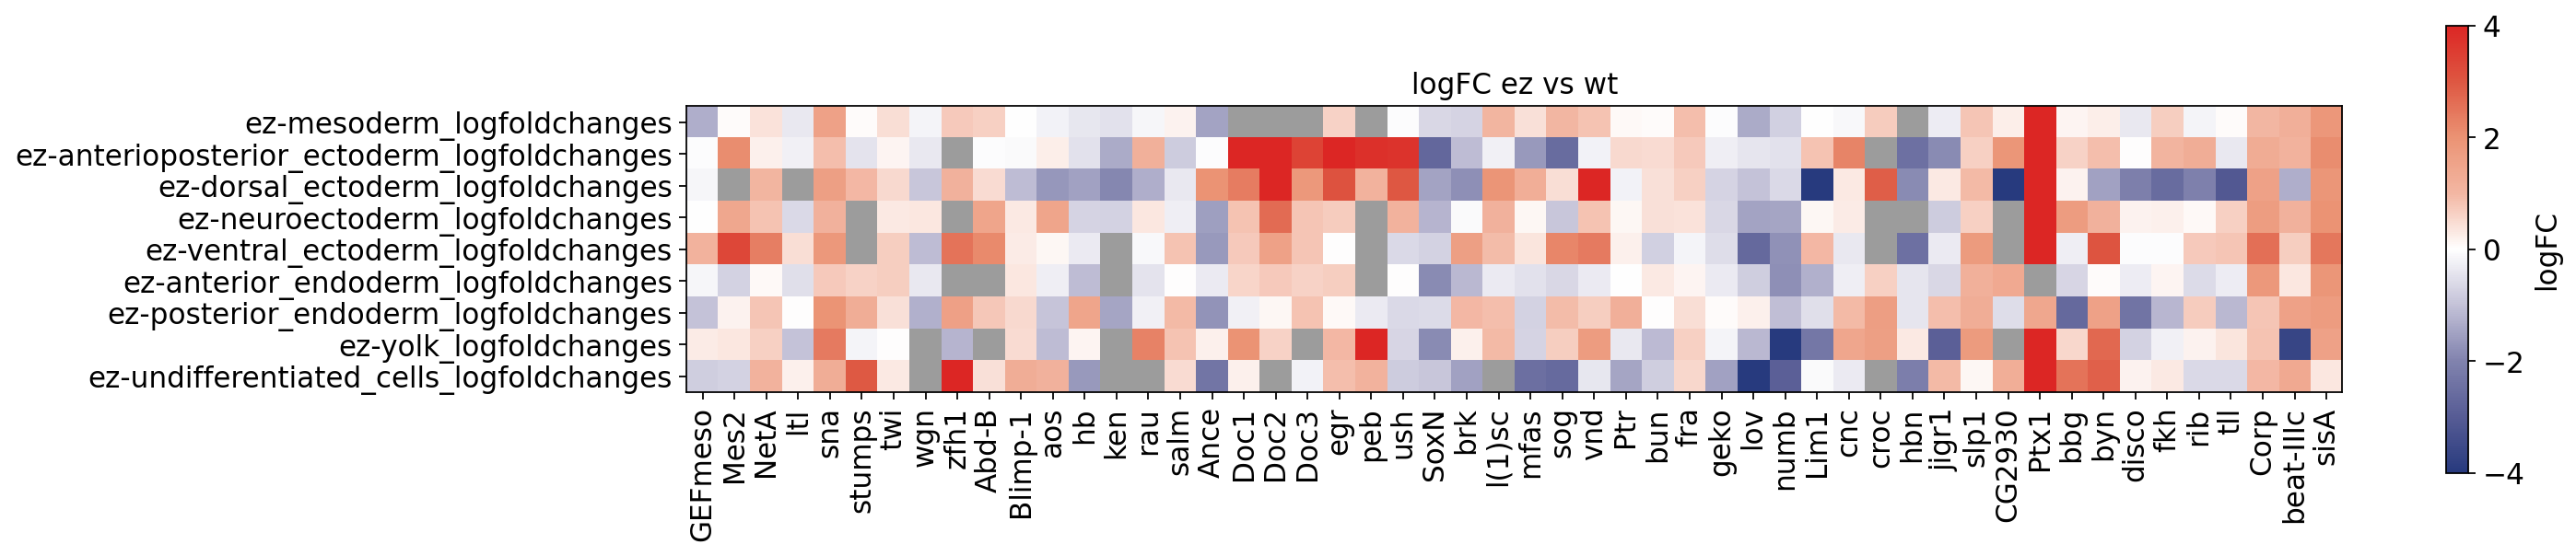

In [65]:

fig,axs=plt.subplots(1,1,figsize=(18,4))
shw1=plt.imshow(resfc.where(keep_pct).T,cmap=cmap_blured,#linewidths=0.2, linecolor='white',  #annot=True, 
            norm=divnorm, )
plt.grid(visible=False)
plt.title('logFC ez vs wt')
plt.xlabel('')
axs.set_xticks(np.arange(len(resfc.index)))
axs.set_xticklabels(resfc.index,rotation=90 )
axs.set_yticks(np.arange(len(resfc.columns)))
axs.set_yticklabels(resfc.columns,rotation=0 )
bar1 = plt.colorbar(shw1)
bar1.set_label('logFC')


#plt.savefig('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/figures/aprile24/heatmap_with_thresholds/heatmap_ez_vs_wt_RNA_markers_threshold%spct.pdf'%(threshold))


In [66]:
resfc.where(keep_pct).to_csv('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/tables/matrix_RNA_ez_vs_wt_threshold%spct.csv'%(threshold))

In [67]:
resfc.where(keep_pct).isna().sum()

ez-mesoderm_logfoldchanges                     5
ez-anterioposterior_ectoderm_logfoldchanges    2
ez-dorsal_ectoderm_logfoldchanges              2
ez-neuroectoderm_logfoldchanges                6
ez-ventral_ectoderm_logfoldchanges             5
ez-anterior_endoderm_logfoldchanges            5
ez-posterior_endoderm_logfoldchanges           0
ez-yolk_logfoldchanges                         5
ez-undifferentiated_cells_logfoldchanges       6
dtype: int64

## Average logFC

In [69]:
##
resfc=resfc.where(keep_pct)


In [70]:
fc_average={}
for k, v in markers2.items():
    fc_average[k]=resfc.loc[v].mean()
    

In [71]:
fc_average=pd.DataFrame.from_dict(fc_average)
fc_average

,Mesoderm markers,Anterioposterior ectoderm,Dorsal ectoderm markers,Neuroectoderm markers,Ventral Ectoderm Markers,Anterior endoderm markers,Posterior endoderm markers,Yolk cells
ez-mesoderm_logfoldchanges,0.157492,-0.061691,-0.307921,0.329839,-0.197569,0.221024,0.642878,1.355602
ez-anterioposterior_ectoderm_logfoldchanges,0.281118,-0.202889,3.544980,-1.401919,0.091457,-0.124981,4.239248,1.500172
ez-dorsal_ectoderm_logfoldchanges,0.615595,-1.047384,2.508313,0.814302,-0.241590,-4.022779,-4.103173,0.724402
ez-neuroectoderm_logfoldchanges,0.489079,0.268114,0.747530,-0.019038,-0.444969,0.050320,4.552276,1.612591
ez-ventral_ectoderm_logfoldchanges,1.386558,0.477724,0.149258,1.136366,-0.948648,-0.078767,1.516167,1.908279
ez-anterior_endoderm_logfoldchanges,0.037145,-0.287535,0.373572,-0.794404,-0.416706,-0.132940,-0.040543,1.349527
ez-posterior_endoderm_logfoldchanges,0.437896,0.158552,-0.273404,0.356472,0.147877,0.638615,-0.516283,1.366418
ez-yolk_logfoldchanges,0.162294,0.532083,4.913611,0.171987,-1.313986,-0.009695,4.152819,-0.414212
ez-undifferentiated_cells_logfoldchanges,3.900580,0.333412,-0.193329,-1.583868,-1.708560,-0.291718,4.051077,0.889604


In [72]:
divnorm2=colors.TwoSlopeNorm(vmin=-5, vcenter=0., vmax=5)

In [73]:

fc_average=fc_average[['Mesoderm markers','Yolk cells',  'Posterior endoderm markers','Dorsal ectoderm markers','Anterioposterior ectoderm',
        'Neuroectoderm markers','Anterior endoderm markers','Ventral Ectoderm Markers']]
fc_average=fc_average.loc[['ez-dorsal_ectoderm_logfoldchanges', 'ez-neuroectoderm_logfoldchanges','ez-ventral_ectoderm_logfoldchanges',
                  'ez-anterior_endoderm_logfoldchanges','ez-mesoderm_logfoldchanges','ez-posterior_endoderm_logfoldchanges', 
                 'ez-anterioposterior_ectoderm_logfoldchanges', 'ez-yolk_logfoldchanges','ez-undifferentiated_cells_logfoldchanges']]

In [74]:
col2=fc_average.index
col2=[e.replace('ez-','ez_vs_wt_-_').replace('_logfoldchanges','').replace('_',' ') for e in col2]

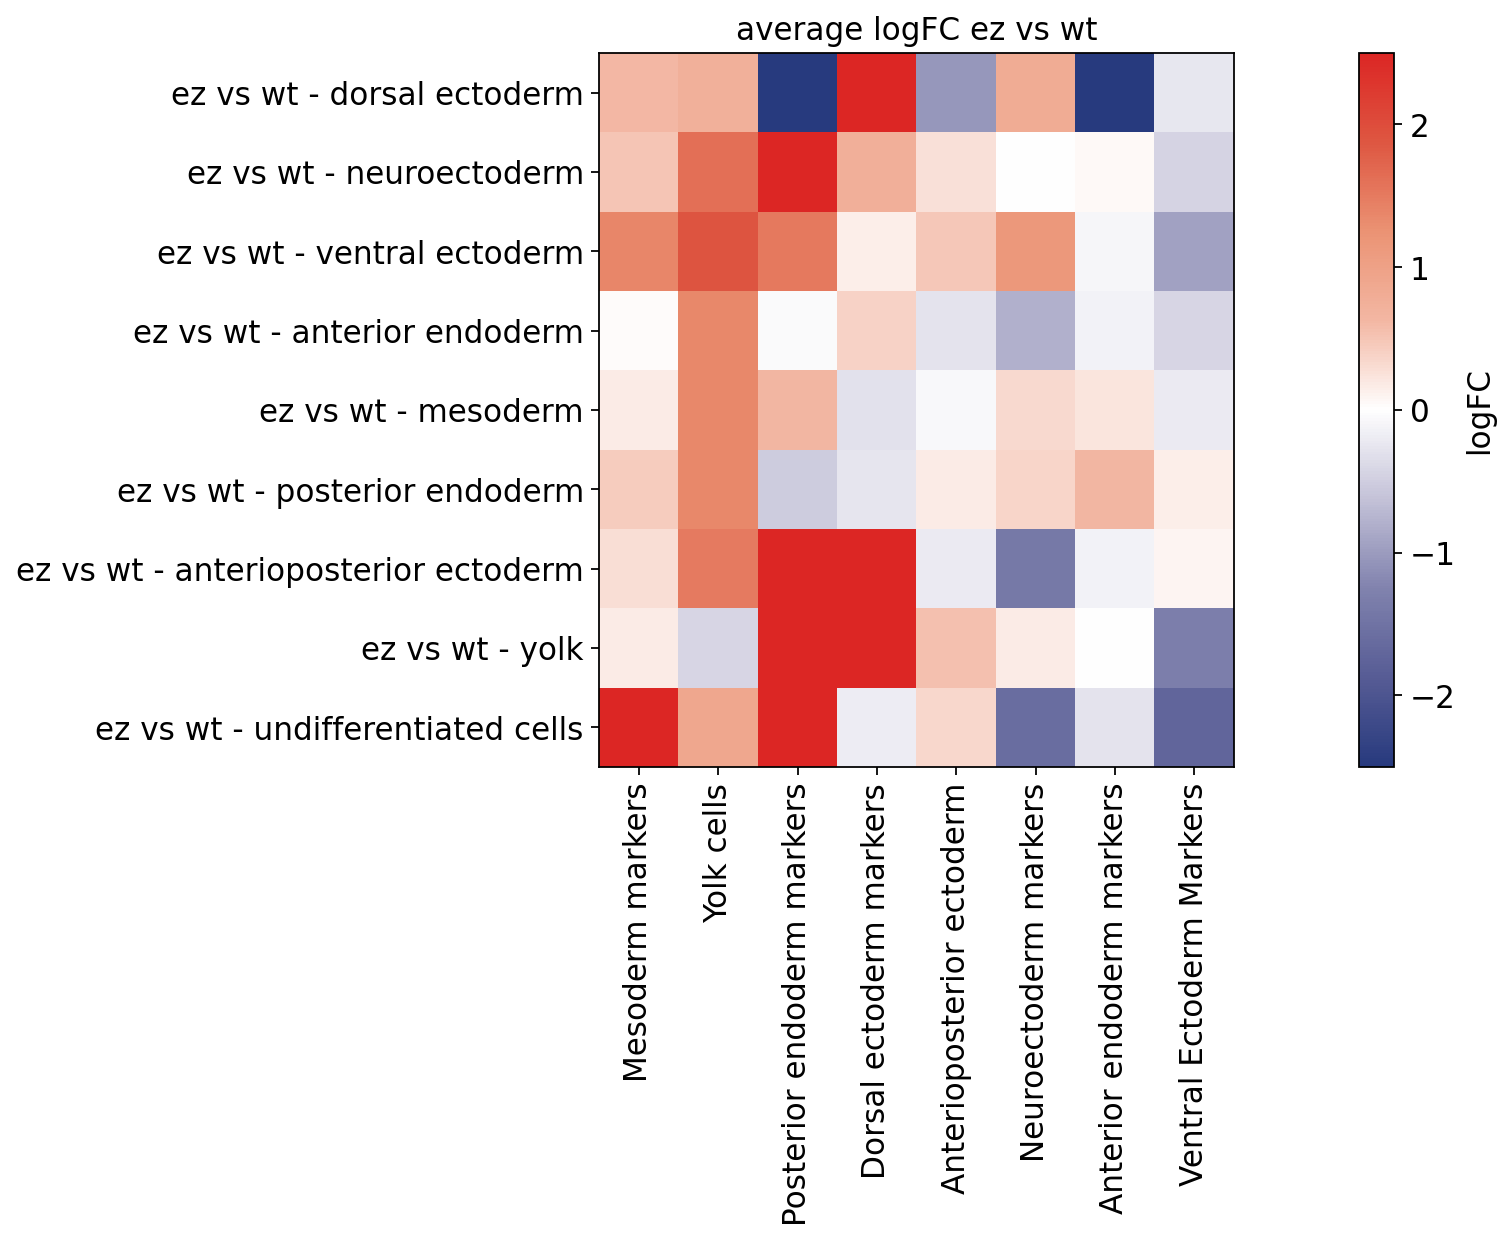

In [76]:
fig,axs=plt.subplots(1,1,figsize=(16,8))
shw1=plt.imshow(fc_average,cmap=cmap_blured,#linewidths=0.2, linecolor='white',  #annot=True, 
            norm=colors.TwoSlopeNorm(vmin=-2.5, vcenter=0., vmax=2.5) 
               )
plt.grid(visible=False)
plt.title('average logFC ez vs wt')

plt.xlabel('')
axs.set_xticks(np.arange(8))
axs.set_xticklabels(fc_average.columns,rotation=90 )

axs.set_yticks(np.arange(len(col2)))
axs.set_yticklabels(col2,rotation=0)
bar1 = plt.colorbar(shw1)
bar1.set_label('logFC')
plt.tight_layout()

#plt.savefig('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/figures/aprile24/heatmap_with_thresholds/heatmap_ez_vs_wt_RNA_markers_avgFC_threshold%spct(2).pdf'%(threshold))